# Correction of earthquake catalog 

In [1]:
from main import preprocess_data, train_model, make_predictions
import utils
import models
import matplotlib.pyplot as plt

In [2]:
filepath = "data/new_data.csv"
features = [
    "bias_lat",
    "bias_long",
    "bias_depth",
    "semiMajorAxisLength",
    "semiMinorAxisLength",
    "semiIntermediateAxisLength",
    "majorAxisPlungeSin",
    "majorAxisPlungeCos",
    "majorAxisAzimuthSin",
    "majorAxisAzimuthCos",
    "majorAxisRotationSin",
    "majorAxisRotationCos",
    "scatter_volume",
]

targets = ["ref_lat", "ref_long", "ref_depth"]
model_option = "RF"
sample_size = 4000

# Load and preprocess the data
data = preprocess_data(filepath, features, targets)


## Train the model

In [3]:
model = train_model(
    data=data, features=features, targets=targets, model_option=model_option
)

In [4]:
model

RandomForestRegressor(n_estimators=1800, random_state=42)

In [5]:
score = model.score(data[features], data[targets])
print(f'R^2 score: {score:.2f}')

R^2 score: 0.79


Figure saved as map_data2D_20230606_151945.png


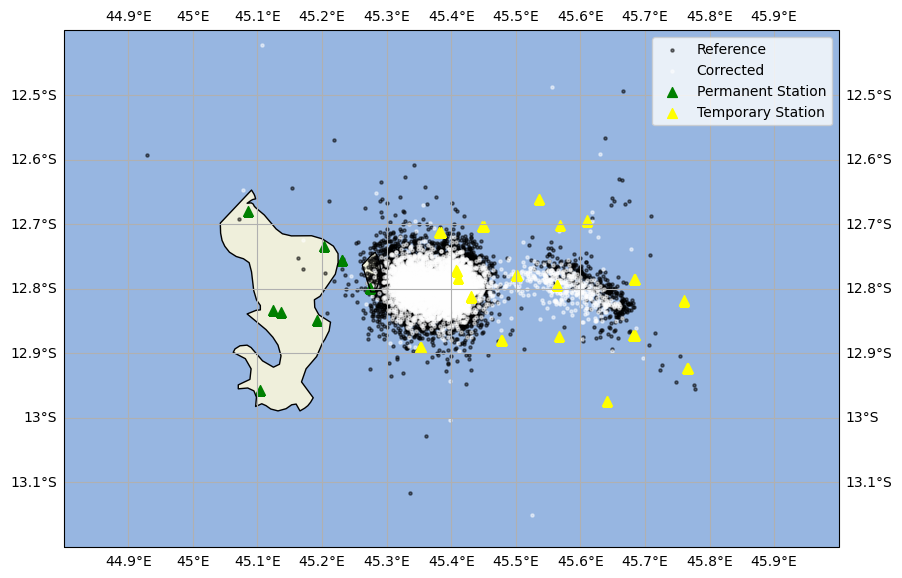

In [6]:
result = make_predictions(model, data, features)
utils.map_data2D(result, options=["ref", "corr"])

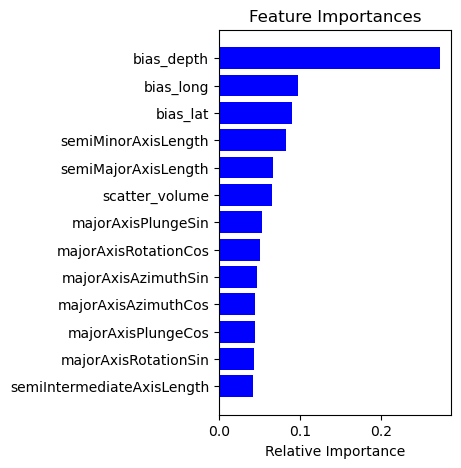

In [13]:
plt.close()
utils.plot_feature_importance_bar_chart(model, features)

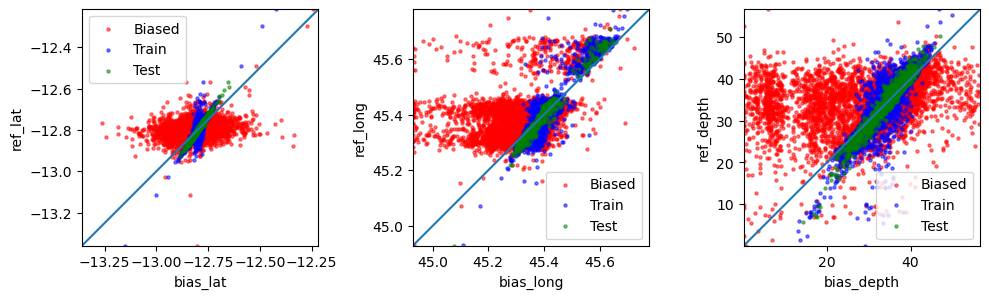

In [14]:
utils.plot_predictions(data, model, features, targets)